# NAVis
This notebook will give you a flavour of what you can do using NAVis. For more check out the online [documentation](https://navis.readthedocs.io/en/latest/?badge=latest) and [tutorials](https://navis.readthedocs.io/en/latest/source/gallery.html)!


### Google colab setup

If you are running this notebook in Google Colab make sure to follow the instructions below to install NAVis!

In [1]:
%%capture
# First we need to install navis
# Note we're also updating matplotlib and ipywidgets because Colab comes some preinstalled but very outdated versions
!pip install navis[all] ipywidgets matplotlib -U

Almost done! There is only one more thing to do:

**Restart the runtime** before continuing by going to _"Runtime"_ -> _"Restart runtime"_ and confirm with _"Yes"_. This is necessary because Google Colab loads a bunch of packages before we even run above install command and we have to make sure our newly installed/updated packages are reloaded.

### Quickstart

You should be good to go now! Let's have a bit of a play, shall we?

NAVis lets you load data from a variety of local (e.g. SWC files) and remote sources (e.g. neuPrint or neuromorpho). For details on that see the [docs](https://navis.readthedocs.io/en/latest/?badge=latest) and [tutorials](https://navis.readthedocs.io/en/latest/source/gallery.html). 

Here, we will use a few _Drosophila_ neurons from the Janelia hemibrain project that ship with `navis` exactly for demo purposes like this. 

In [1]:
# Import navis
import navis

# Grab some of the example neurons
neuron_list = navis.example_neurons(3, kind='skeleton')

# Print a summary of neurons in the list
neuron_list

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units,created_at,origin,file
0,navis.TreeNeuron,DA1_lPN_R,1734350788,4465,2705,599,618,266476.87500,4177.0,8 nanometer,2024-09-04 13:40:14.321088,/Users/philipps/Github/navis/navis/data/swc/17...,1734350788.swc
1,navis.TreeNeuron,DA1_lPN_R,1734350908,4847,3042,735,761,304332.65625,6.0,8 nanometer,2024-09-04 13:40:14.326738,/Users/philipps/Github/navis/navis/data/swc/17...,1734350908.swc
2,navis.TreeNeuron,DA1_lPN_R,722817260,4332,3136,633,656,274703.37500,NaN,8 nanometer,2024-09-04 13:40:14.330488,/Users/philipps/Github/navis/navis/data/swc/72...,722817260.swc


In [2]:
# To access individual neurons, use neuron_list like a normal list object
neuron_list[0]

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,599
n_leafs,618
cable_length,266476.875
soma,4177
units,8 nanometer


In above examples, ``neuron_list`` is an instance of the ``NeuronList`` class and holds three neurons all of which are of the ``TreeNeuron`` class. Check out their documentation for methods and attributes!

#### Plotting is easy and straight forward
Let's start by making a simple 2D plot using matplotlib. Please read the documentation for limits of this approach.

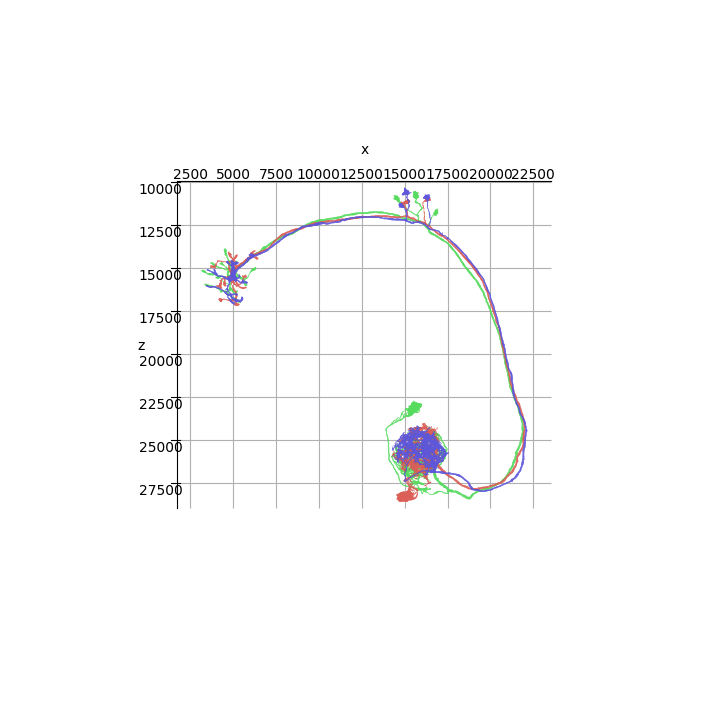

In [4]:
# Matplotlib 2D plot
import matplotlib.pyplot as plt

fig, ax = neuron_list.plot2d(view=("x", "-z"))
plt.tight_layout()

You can call ``plot2d()`` either directly from a Neuron or NeuronList as above or use the base function to combine different objects:

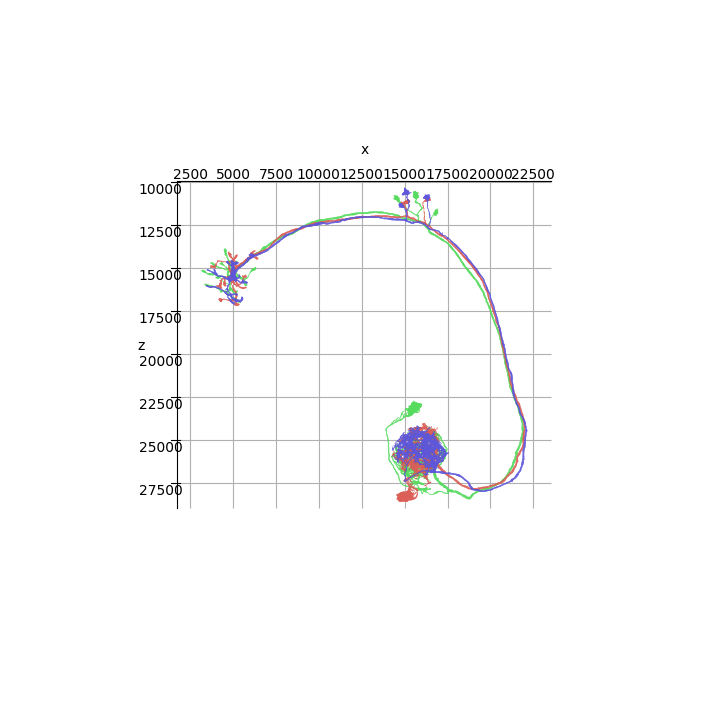

In [5]:
# Same result as above
fig, ax = navis.plot2d(neuron_list, view=("x", "-z"))
plt.tight_layout()

For **3d**, NAVis uses ``octarine`` or ``vispy`` if you are working in the terminal, an ``plotly`` if you are in a Jupyter environment.

In [ ]:
# Generate and render inline 3D plotly
fig = neuron_list.plot3d(height=1000)

This method simply calls `navis.plot3d` - check out the docs for which parameters you can pass along.

### The Basics
Neurons (or rather their reconstructions) can be represented in multiple ways. NAVis has different neuron types for each of those:

- `navis.TreeNeurons` for tree-like skeletons
- `navis.MeshNeurons` for neurons consisting of vertices and faces
- `navis.VoxelNeurons` for neurons represented by voxels (e.g. from microscopy)
- `navis.Dotprops` for neurons represented by point clouds

Multiple neurons are grouped into `navis.NeuronList`!

In [8]:
# Load a mix of example neurons
mix = navis.example_neurons(n=2, kind='mix')
mix

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units,created_at,origin,file,n_vertices,n_faces
0,navis.TreeNeuron,DA1_lPN_R,1734350788,4465.0,2705,599.0,618.0,266476.875,4177,8 nanometer,2024-09-04 13:42:39.943580,/Users/philipps/Github/navis/navis/data/swc/17...,1734350788.swc,NaN,NaN
1,navis.MeshNeuron,DA1_lPN_R,1734350788,NaN,2705,NaN,NaN,NA,NA,8 nanometer,NA,NA,NA,6309.0,13054.0


Neurons/Lists have methods (functions like the `neuron_list.plot2d`) and properties. Some are universal, others are specific to e.g. `TreeNeurons` or `MeshNeurons`

In [9]:
# As TreeNeuron this neuron has nodes
mix[0].nodes

,node_id,label,x,y,z,radius,parent_id,type
0,1,0,15784.0,37250.0,28062.0,10.000000,-1,root
1,2,0,15764.0,37230.0,28082.0,18.284300,1,slab
2,3,0,15744.0,37190.0,28122.0,34.721401,2,slab
3,4,0,15744.0,37150.0,28202.0,34.721401,3,slab
4,5,0,15704.0,37130.0,28242.0,34.721401,4,slab
...,...,...,...,...,...,...,...,...
4460,4461,6,15424.0,37050.0,27682.0,30.000000,2623,end
4461,4462,6,15424.0,36950.0,28062.0,30.000000,3075,end
4462,4463,6,14544.0,36430.0,28422.0,62.111000,4178,end
4463,4464,6,14944.0,36510.0,28282.0,294.631012,4382,end


In [10]:
# ... a MeshNeuron has vertices but no nodes
mix[1].vertices

TrackedArray([[16384.        , 34792.03125   , 24951.88085938],
              [16384.        , 36872.0625    , 25847.89453125],
              [16384.        , 36872.0625    , 25863.89453125],
              ...,
              [ 5328.08105469, 21400.07617188, 16039.99414062],
              [ 6872.10498047, 19560.04882812, 13903.96191406],
              [ 6872.10498047, 19488.046875  , 13927.96191406]])

All shared attributes can be accessed via the `NeuronList`:

In [11]:
mix.name

array(['DA1_lPN_R', 'DA1_lPN_R'], dtype='<U9')

In [12]:
mix.id

array([1734350788, 1734350788])

This only works if the attributes exists for all neurons

In [13]:
# This will fail
mix.root

AttributeError: Attribute or function "root" missing for some neurons

``NeuronLists`` support some fancy indexing similar to the syntax in numpy arrays  (more in the docs)

In [17]:
nl = navis.example_neurons(5, kind='skeleton')
nl

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,TreeNeuron,1734350788,1734350788,4465,None,603,619,266458.006156,[4176],8 nanometer
1,TreeNeuron,1734350908,1734350908,4845,None,733,760,304277.012678,[6],8 nanometer
2,TreeNeuron,722817260,722817260,4336,None,635,658,274910.560630,None,8 nanometer
3,TreeNeuron,754534424,754534424,4702,None,697,727,286742.979233,[4],8 nanometer
4,TreeNeuron,754538881,754538881,4890,None,626,642,291434.987947,[703],8 nanometer


In [18]:
nl[nl.n_nodes > 4500]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,TreeNeuron,1734350908,1734350908,4845,None,733,760,304277.012678,[6],8 nanometer
1,TreeNeuron,754534424,754534424,4702,None,697,727,286742.979233,[4],8 nanometer
2,TreeNeuron,754538881,754538881,4890,None,626,642,291434.987947,[703],8 nanometer


The above has (hopefully) given you an idea of the basic datastructure and idiom in NAVis. Now what can you do once you have your neurons loaded? The short answer is: a lot! The slightly longer answer is this:

1. Convert between neuron types (e.g. skeletonize `MeshNeurons`)
2. Process the neurons (e.g. simplifying, resampling or pruning)
3. Morphometrics from basic stats to Strahler indices to Sholl analysis and more
4. Visualisation

We won't have time to go into much detail on any of the above but there are extensive [tutorials](https://navis.readthedocs.io/en/latest/source/gallery.html) if you have a particular interest. What we can do is give quick examples!

#### Conversion
A typical thing you might want to do is produce skeletons from meshes - e.g. to have a more compact representation or if you want to run some topological analysis.

In [3]:
# Load an example mesh neuron
m = navis.example_neurons(1, kind='mesh')
m

,
type,navis.MeshNeuron
name,DA1_lPN_R
id,1734350788
units,8 nanometer
n_vertices,6309
n_faces,13054


In [6]:
# Convert to skeleton (using the default settings here but there is plenty ways to optimize)
s = navis.skeletonize(m)
s

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,1070
n_connectors,None
n_branches,92
n_leafs,189
cable_length,163978.062363
soma,471
units,8 nanometer


#### Processing
Skeletonization is a finicky process and it is easy to produce noisy skeletons. The skeleton produced above will look fairly good already but for the sake of the argument, let's say we need to clean it up a little:

In [7]:
# Prune some small twigs/bristles to make the skeleton cleaner
# This neuron is in 8x8x8nm voxel space - let's prune all terminal twigs under 125 voxels = 1 micron
s = navis.prune_twigs(s, 125)
s

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,997
n_connectors,None
n_branches,89
n_leafs,117
cable_length,162415.971781
soma,471
units,8 nanometer


In [17]:
# Note how the number of nodes and leafs has dropped?
# Next, let's smooth the neuron a little
s = navis.smooth_skeleton(s, window=2)
s

Smoothing:   0%|          | 0/117 [00:00<?, ?it/s]

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,997
n_connectors,None
n_branches,89
n_leafs,117
cable_length,154236.760733
soma,471
units,8 nanometer


All of the processing steps (and indeed most NAVis functions) accept not only single neurons but whole `NeuronLists` which makes it easy to process batches of neurons. More importantly, you can in many cases set `parallel=True` and NAVis will use multiple cores to process your list of neurons.

#### Morphometrics

You have already seen the little summary you get when you just print a neuron or a `NeuronList`. For `TreeNeurons`, for example, this gives you things like the number of branch points and leafs or the cable length. Getting these data as a `pandas` object (`Series` for single neurons, `DataFrame` for lists) is easy:

In [18]:
sm = s.summary()
sm

type            navis.TreeNeuron
name                   DA1_lPN_R
id                    1734350788
n_nodes                      997
n_connectors                None
n_branches                    89
n_leafs                      117
cable_length       154236.760733
soma                         471
units                8 nanometer
dtype: object

In [19]:
type(sm)

pandas.core.series.Series

In [20]:
sm.cable_length

154236.76073285105

The more elaborate (read: "more expensive") morphometrics have their own functions. Let's for example get a summary for each of the neurons segments (i.e. the linear neurites between a leaf and a branch point or between two branch points):

In [21]:
sa = navis.segment_analysis(s)
sa.head()

,length,tortuosity,root_dist,strahler_index,radius_mean,radius_min,radius_max,volume
0,886.106573,1.057123,10702.162815,1,96.461838,65.294486,160.866422,3.110501e+07
1,760.952529,1.291517,11988.506717,2,149.719500,99.641339,220.210002,5.652592e+07
2,746.575429,1.281007,11660.401652,3,113.542870,69.171935,218.156636,2.918815e+07
3,396.056718,1.282277,11316.189491,3,154.714224,87.315559,212.842108,2.557628e+07
4,422.573043,1.029124,12962.664972,1,105.596022,63.180517,181.598752,2.466662e+07


See the docs and tutorials for more details on the available morphometrics.

#### Visualisation
Visualising neurons is a core aspect of NAVis (it's in the name after all). Consequently there is _a ton_ of things you can do - for which there is a bunch of separate tutorials. For demo purposes, let's just co-visualize the skeleton and the mesh we made it from:

In [ ]:
navis.plot3d([m, s],   # pass the two objects (mesh + skeleton) we want to plot
             colors = [(.3, .3, .3, .2), 'r']  # make the mesh translucent and the skeleton red
            )

Make sure to zoom in to compare mesh and skeleton. Note that in this case, the earlier smoothing has "pulled" the skeleton outside the mesh in the finer neurites. If you like, try skeletonizing again, skip the smoothing step and regenerate the plot above.


That's it for now. Again: please see the [docs](https://navis.readthedocs.io/en/latest/?badge=latest) and [tutorials](https://navis.readthedocs.io/en/latest/source/gallery.html) for details and further inspiration.